# Task 1: Default risk
The goal of this exercise is to develop a machine learning pipeline or rule-based algorithm/scorecard
to manage the default risk of customers using historical financial behavior. The notebooks should
contain the end-to-end setup, including data loading, preprocessing, exploratory data analysis
(EDA), model training and validation.

## A
Access the dataset stored in the AWS S3 bucket kuunda-datascience-challenge using
Python and the credentials provided in datascience trainees accessKeys.csv. Load the
data into a Pandas DataFrame. Clearly document your method for accessing S3 securely i.e.
How are the credentials stored.

In [1]:
from utils.get_data import get_all_data, load_training_data
import pandas as pd
from pathlib import Path
import seaborn as sns
from pylab import plt
import numpy as np

%load_ext autoreload
%autoreload 2

# get data and make a dataframe

In [2]:
bucket_name= 'kuunda-datascience-challenge'
data_path = '/app/data'

In [3]:
# download_data
get_all_data(bucket_name,data_path)

In [4]:
# load training data
df = load_training_data(data_path)
df.head()

,customerid,loanid,date_add,prodcode,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,default_ind,write_off_ind
0,e1d4435674175cc4017fa46c1c2f0478314dc697b08bf4...,Agent_OD_249059589,2024-03-23 07:28:31,Overdraft,181026.11,5249757.20,130223.047090,769.95,22328.64,580.451625,...,600000.0000,2400000.0,1,-107407.4074,32,5,-312000.0,1691250.00,0,0
1,8503cedac67cad3d830aff6e1219bc301d0d41aa8cd638...,Agent_OD_252459496,2024-03-28 09:37:43,Overdraft,547723.81,16431714.40,280743.120389,1972.09,59162.88,483.518444,...,70000.0000,280000.0,1,-70000.0000,4,3,-36400.0,101250.00,0,0
2,bf68824fa3376f3c37d0d352651d5936999b1a1cbd6a6a...,Agent_OD_250556868,2024-03-25 12:15:20,Overdraft,1132610.09,33978302.80,647061.932067,2904.35,87130.56,1038.489611,...,450000.0000,450000.0,0,0.0000,1,0,-58500.0,373333.33,0,0
3,159ecbd4bf1390db4d2db4d0fd1794fbce0ced362209e4...,Agent_OD_238029220,2024-03-06 11:26:51,Overdraft,39178.82,901113.08,32345.225954,303.69,6984.96,168.435204,...,367285.7142,2571000.0,1,-101483.4516,35,11,-334230.0,760384.61,0,0
4,159ecbd4bf1390db4d2db4d0fd1794fbce0ced362209e4...,Agent_OD_238032965,2024-03-06 11:31:23,Overdraft,39178.82,901113.08,32345.225954,303.69,6984.96,168.435204,...,367285.7142,2571000.0,1,-101483.4516,35,11,-334230.0,760384.61,0,0


## B
Conduct an exploratory analysis to understand the structure and quality of the data. Provide
descriptive statistics for all features, use appropriate visualizations. Explore correlations
between features and the target variable. Investigate any class imbalance in the target, and
summarize the initial insights and hypotheses you generate from this analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94085 entries, 0 to 23539
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     94085 non-null  object        
 1   loanid         94085 non-null  object        
 2   date_add       94085 non-null  datetime64[ns]
 3   prodcode       94085 non-null  object        
 4   feature_1      94085 non-null  float64       
 5   feature_2      94085 non-null  float64       
 6   feature_3      94085 non-null  float64       
 7   feature_4      94085 non-null  float64       
 8   feature_5      94085 non-null  float64       
 9   feature_6      94085 non-null  float64       
 10  feature_7      94085 non-null  float64       
 11  feature_8      94085 non-null  float64       
 12  feature_9      94085 non-null  float64       
 13  feature_10     94085 non-null  float64       
 14  feature_11     94085 non-null  float64       
 15  feature_12     94085 non

In [6]:
# check if any valures are null
np.any(df.isnull().sum()>0)

np.False_

### EDA
Split int features from numeric and check values and correclations


In [7]:
features = [col for col in df.columns if col.startswith('feature')]

<Axes: >

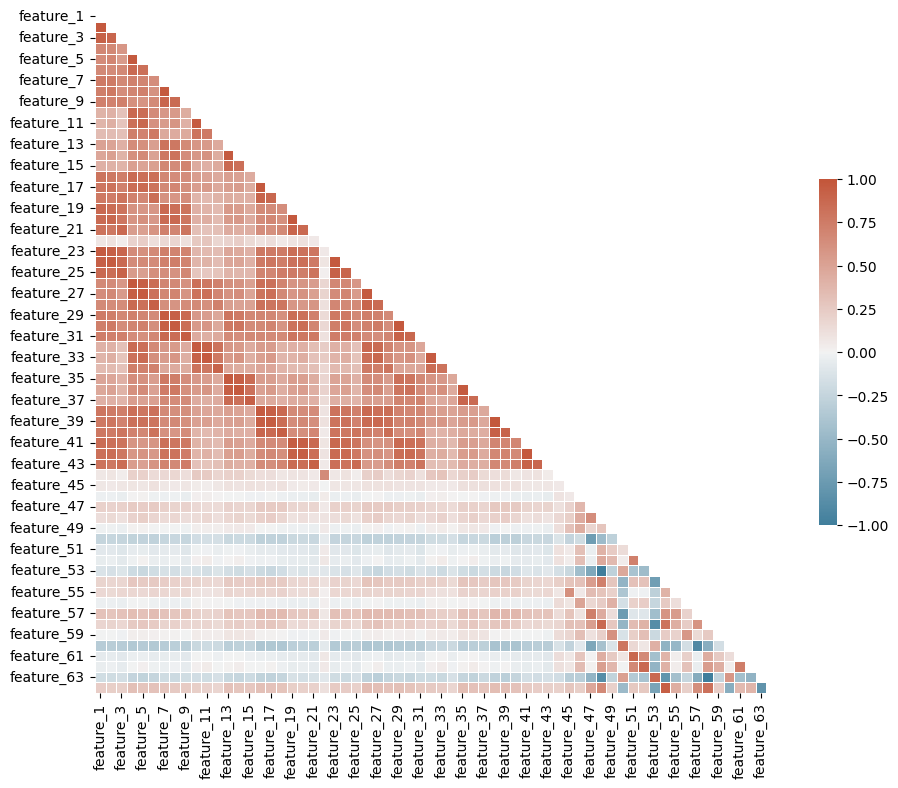

In [8]:
# plot correlations
corr = df[features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Features 1-44 are very correlated to eachother and the others are weekly, will have to be careful on linear models

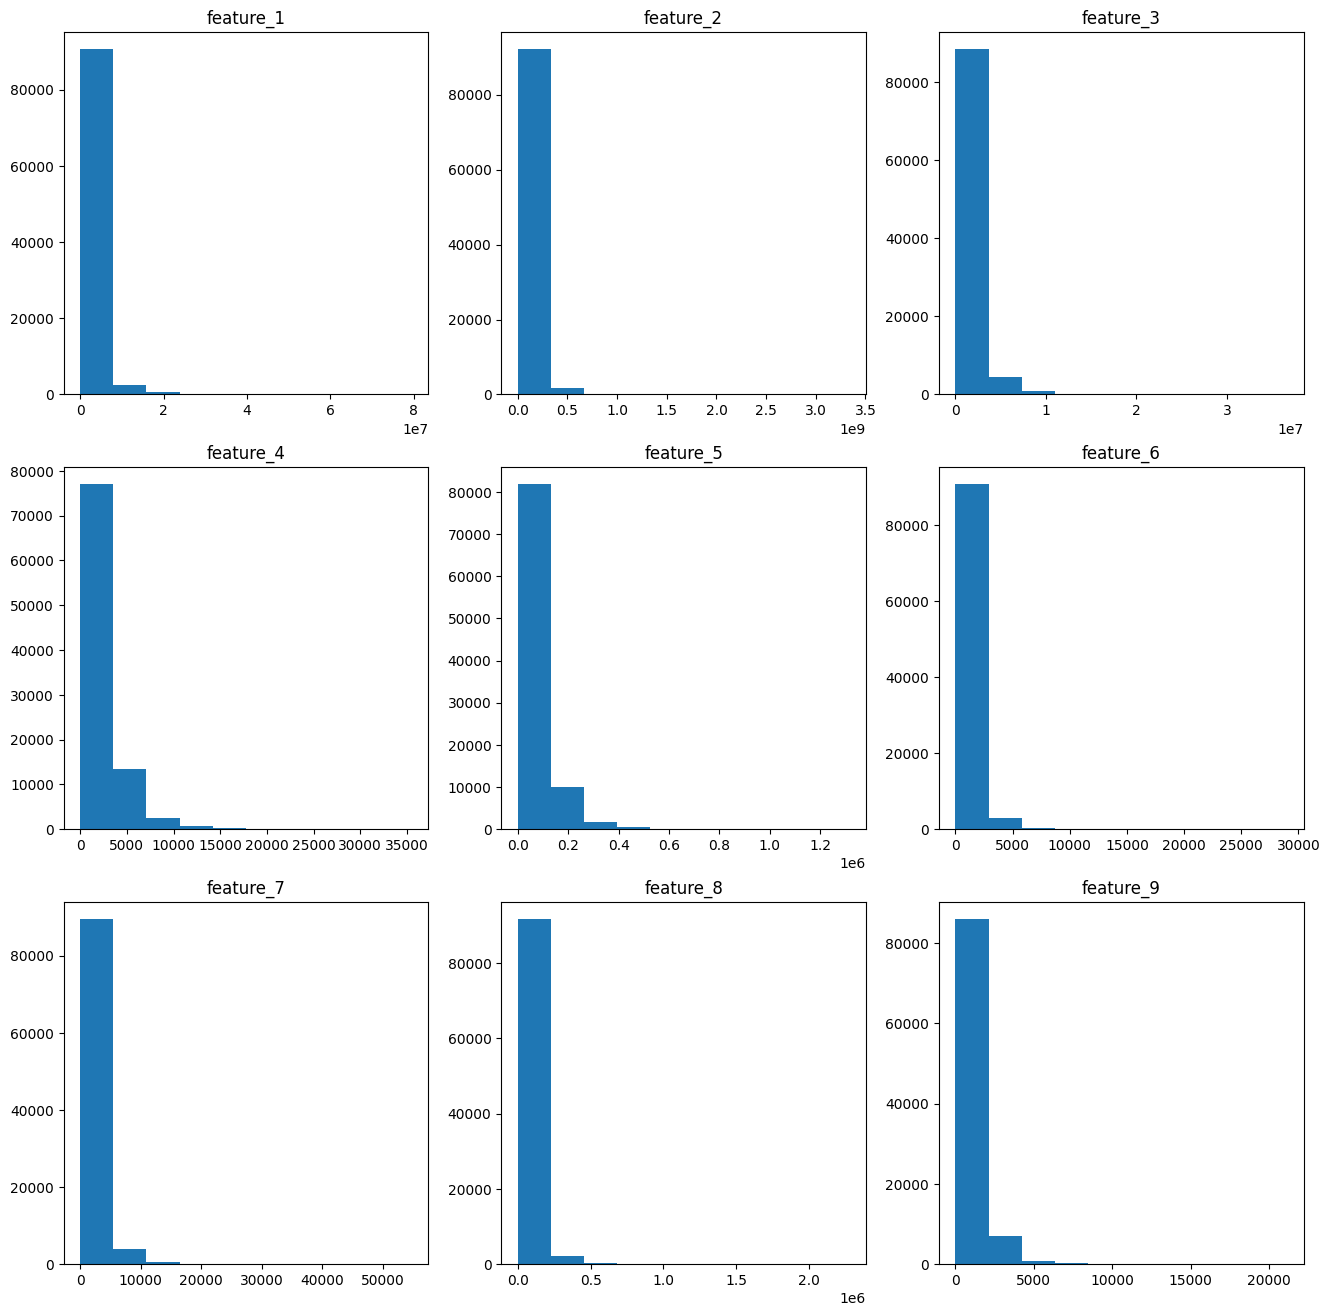

In [9]:
# plot histogram in 3x3 boxes
i_start = 0
fig,*axs=plt.subplots(3,3,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

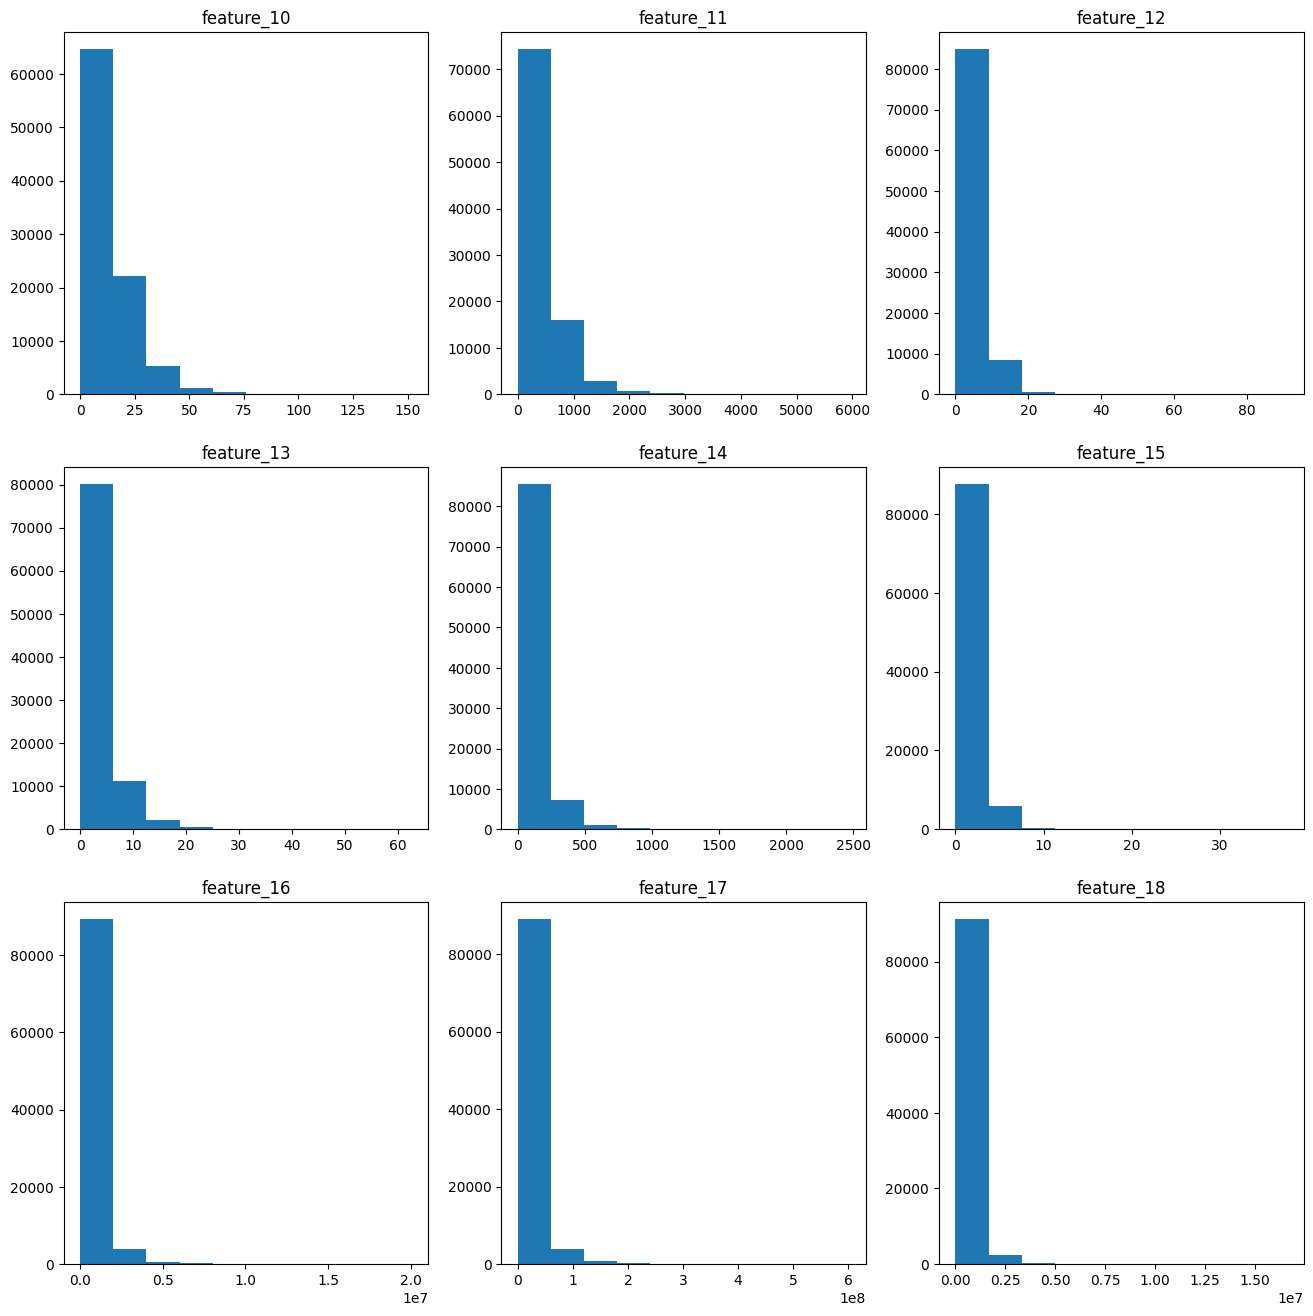

In [10]:
# plot histogram in 3x3 boxes
fig,*axs=plt.subplots(3,3,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

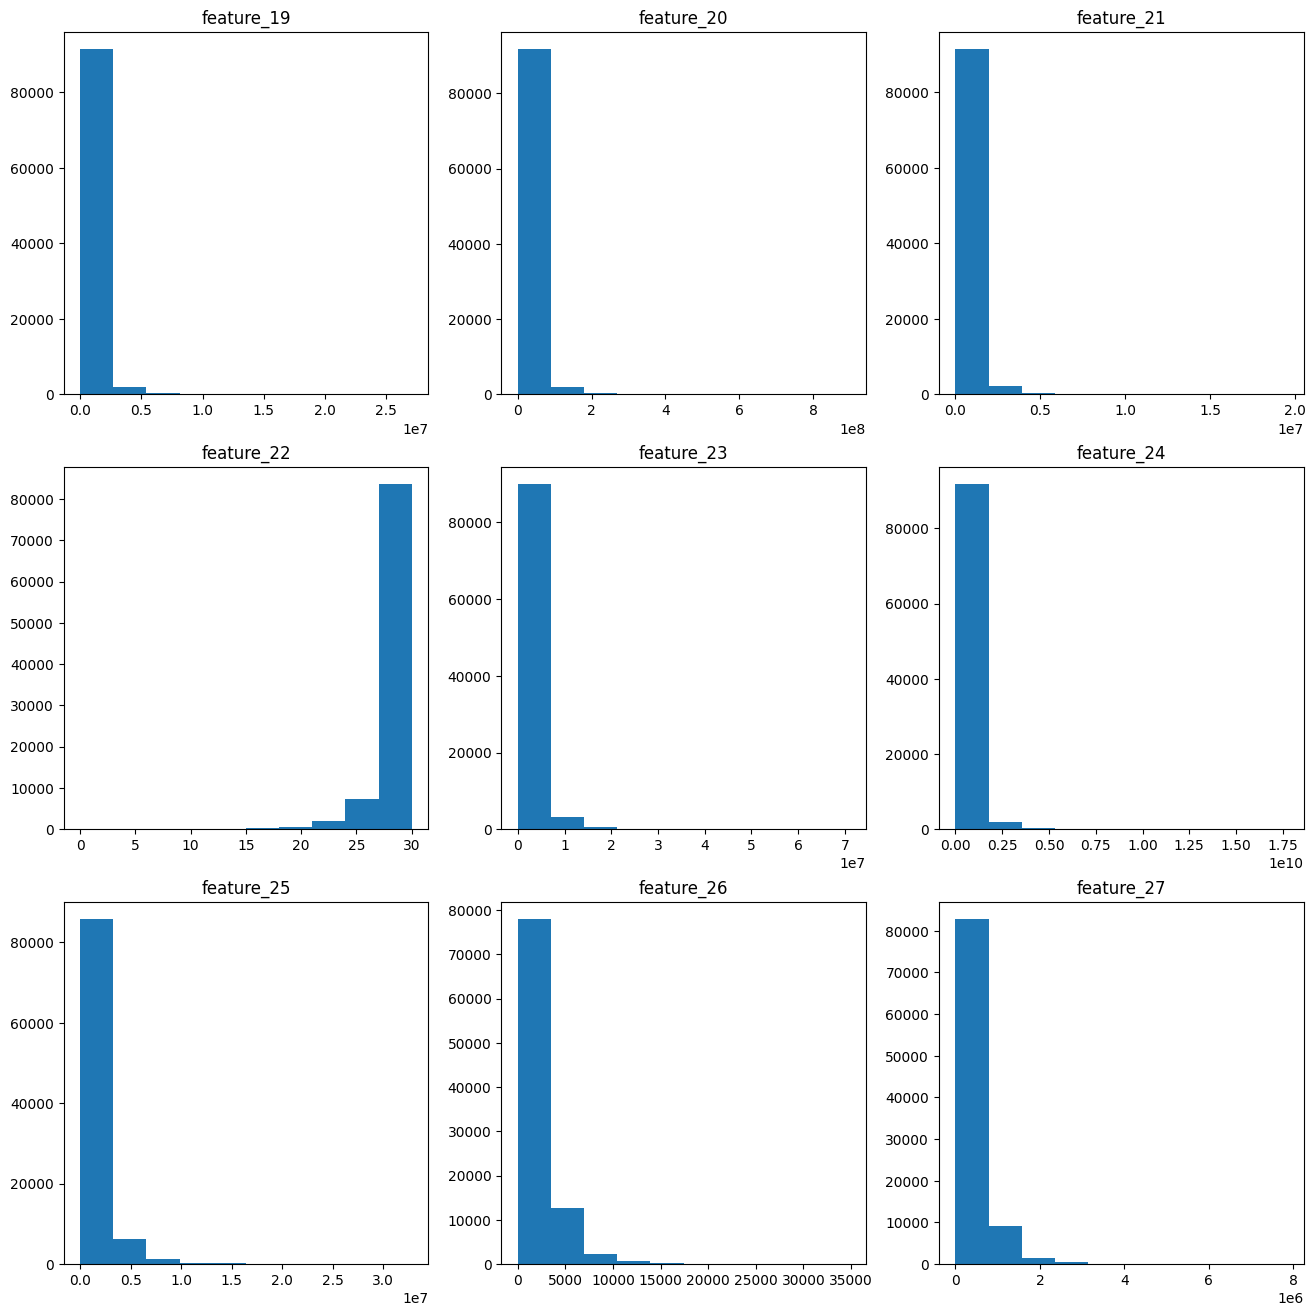

In [11]:
# plot histogram in 3x3 boxes
fig,*axs=plt.subplots(3,3,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

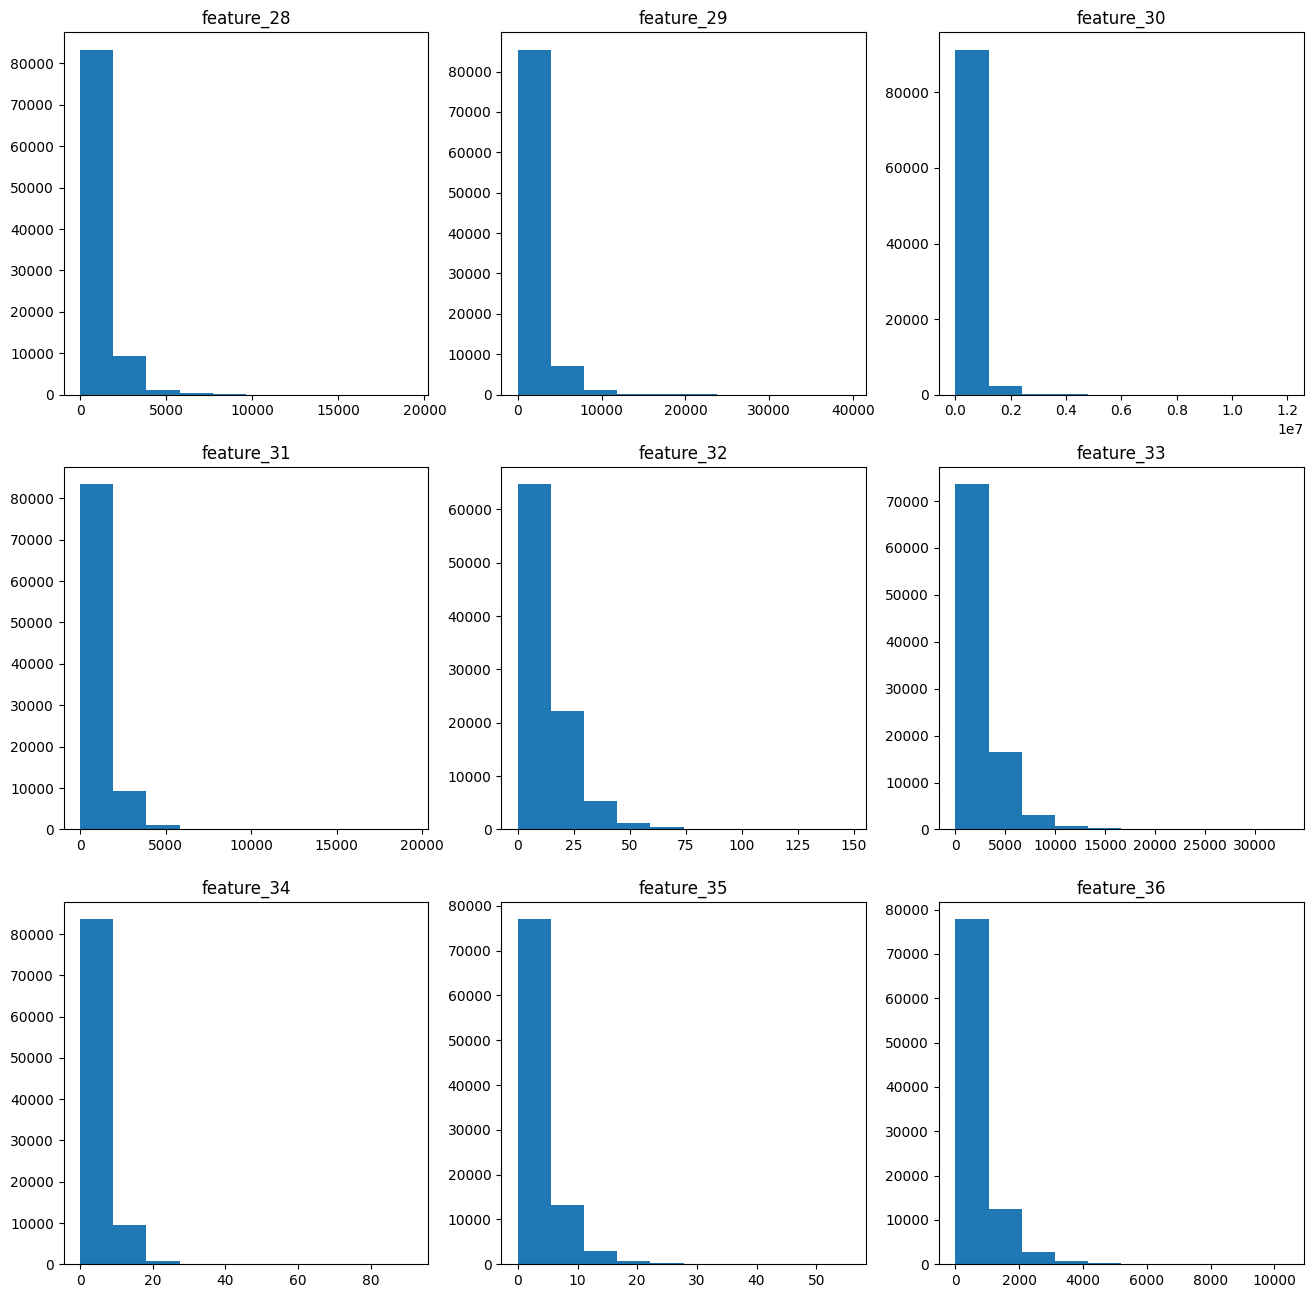

In [12]:
# plot histogram in 3x3 boxes
fig,*axs=plt.subplots(3,3,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

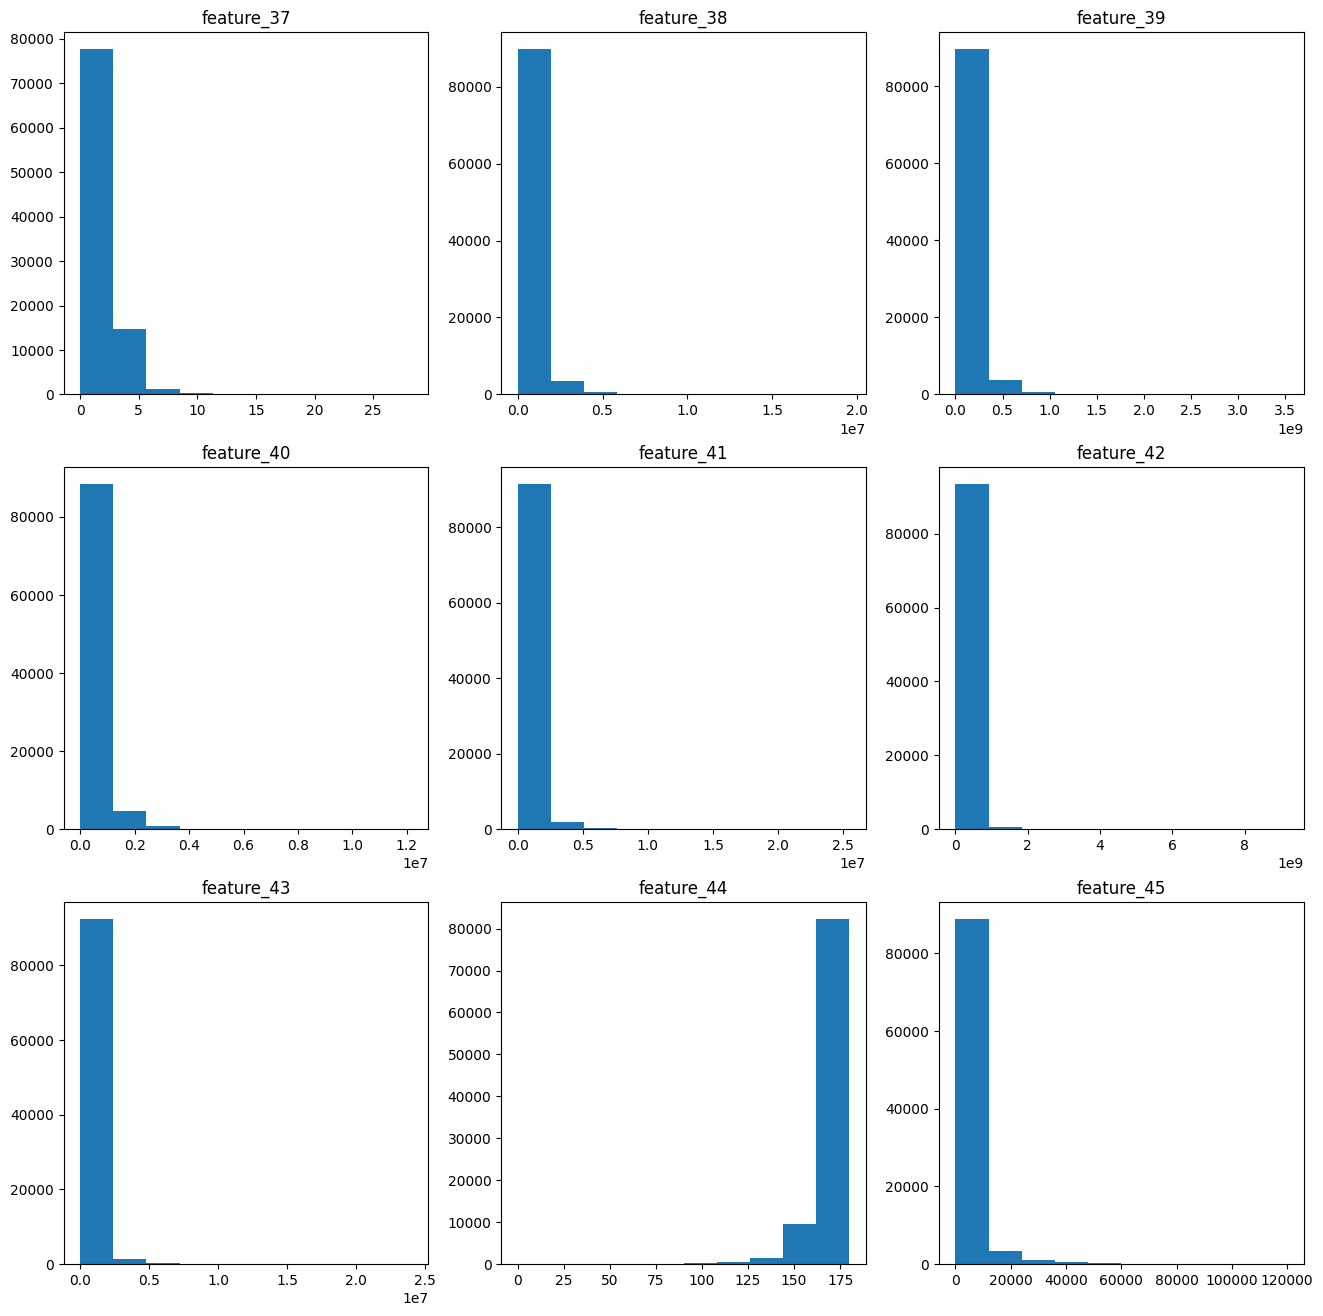

In [13]:
# plot histogram in 3x3 boxes
fig,*axs=plt.subplots(3,3,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

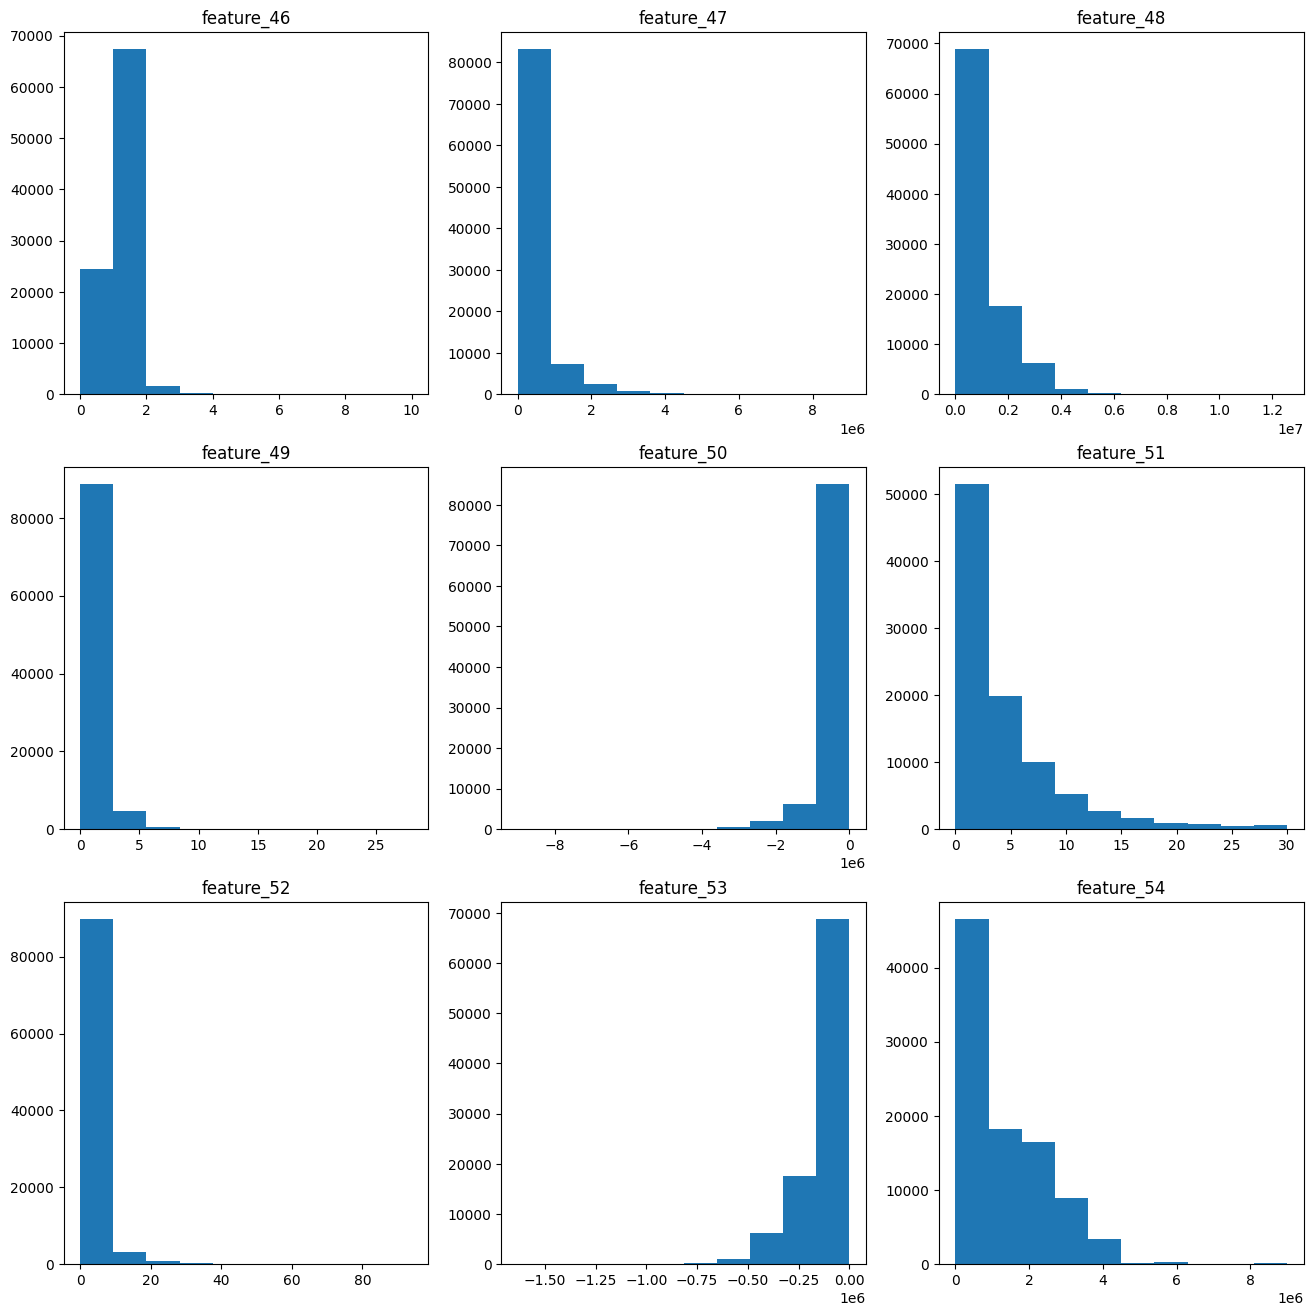

In [14]:
# plot histogram in 3x3 boxes
fig,*axs=plt.subplots(3,3,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

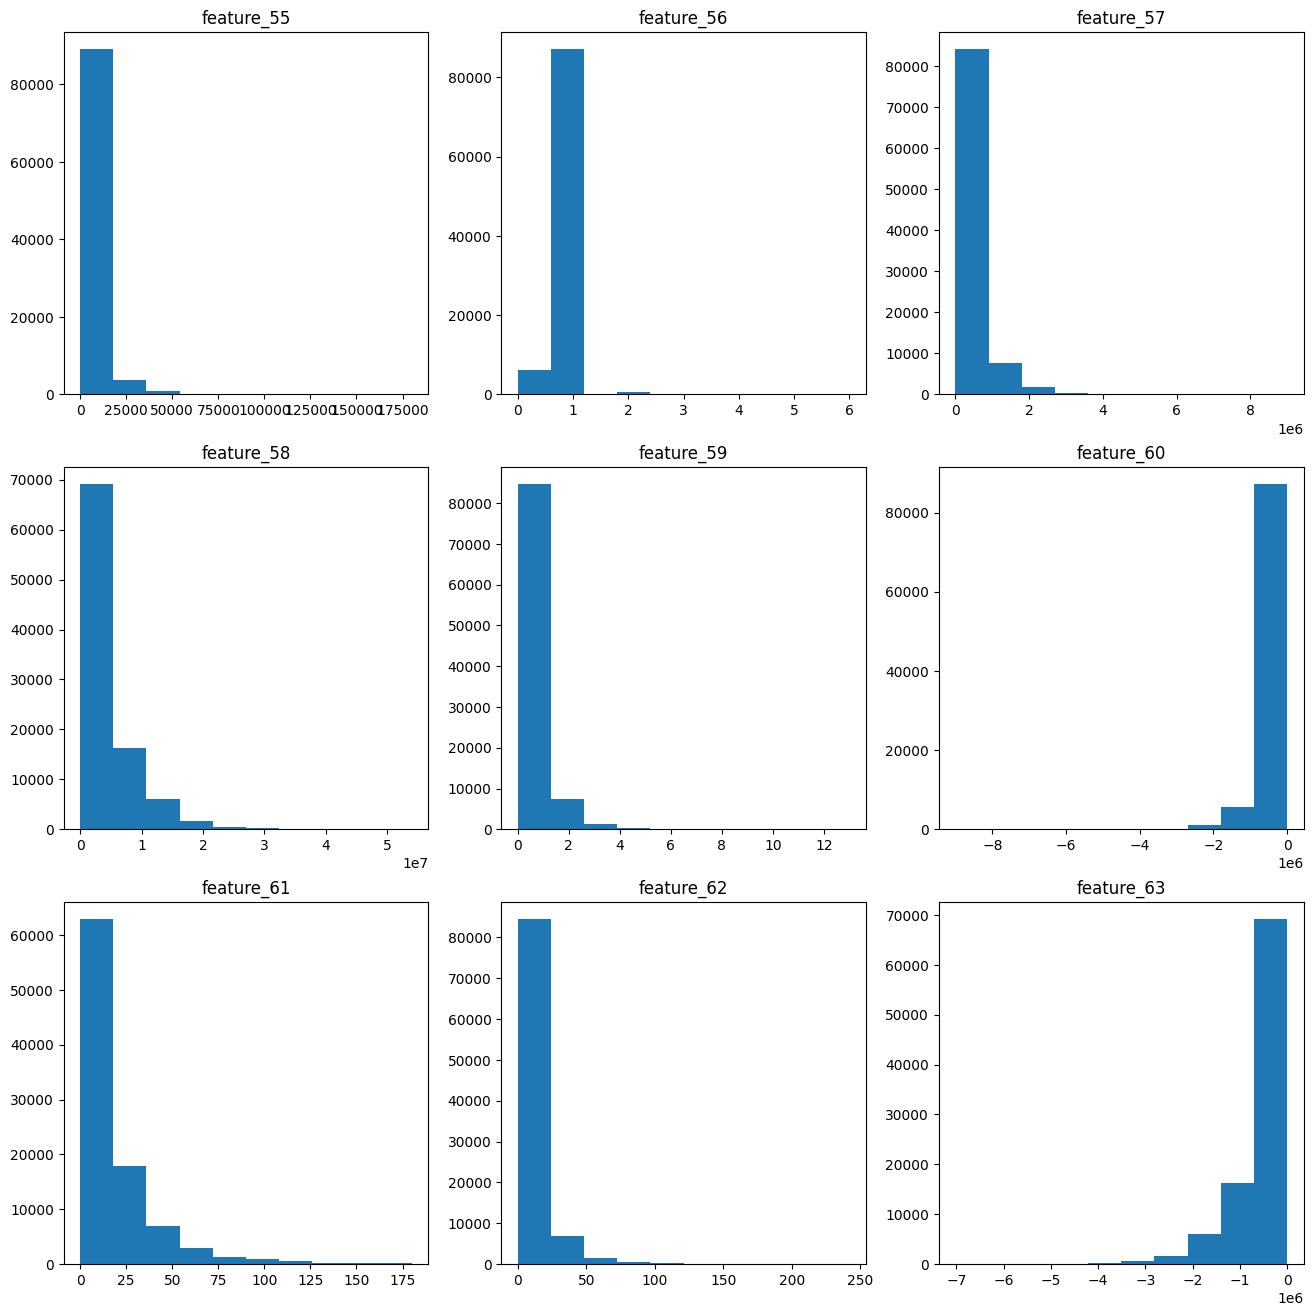

In [15]:
# plot histogram in 3x3 boxes
fig,*axs=plt.subplots(3,3,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

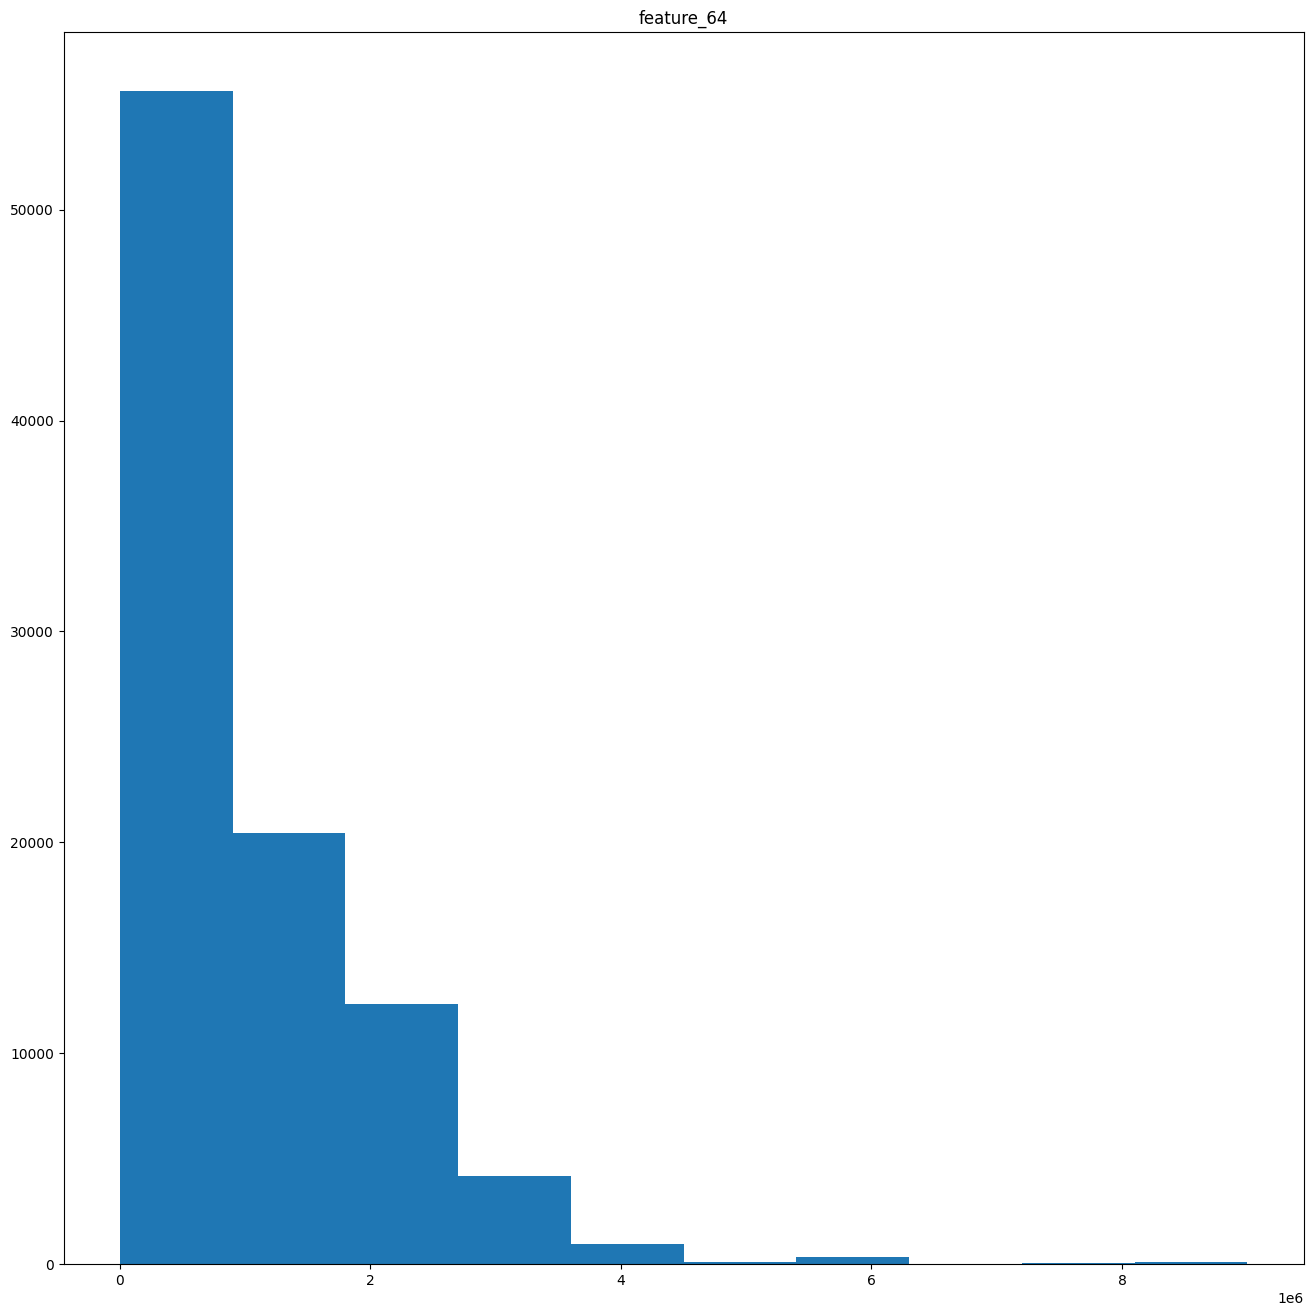

In [16]:
# plot histogram in 3x3 boxes
fig,*axs=plt.subplots(1,1,figsize=(16,16))
axs = np.ravel(axs)
for i,ax in enumerate(axs):
    ax.hist(df[features[i_start+i]])
    ax.set_title(features[i_start+i])
i_start+=i+1

Features seem to have an exponential distrubution, so there must be some sort of boundary on the account or transactions that is here. Not much else i can say without know what the feautres mean

### EDA on loans and repayment

<Axes: xlabel='default_ind'>

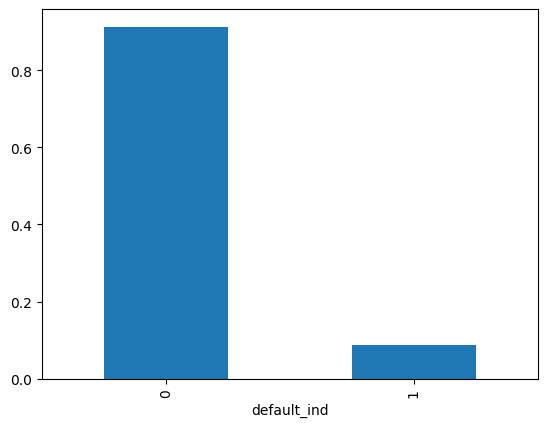

In [17]:
### check class imbalance
(df.groupby('default_ind').count().loanid / df.shape[0]).plot.bar()

Minority class is ~8% of loans, not too imbalanced

Text(0, 0.5, 'Default Rate')

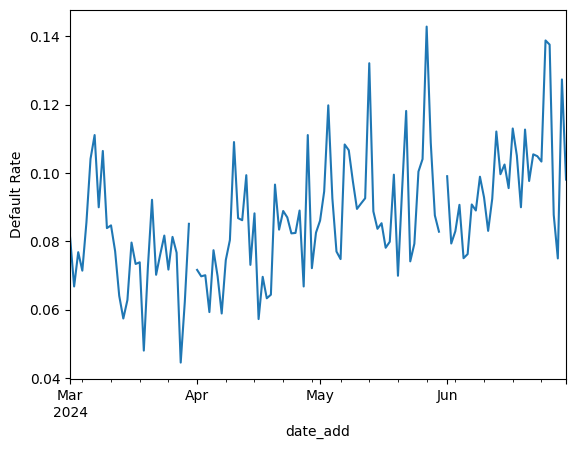

In [18]:

(df.set_index('date_add').groupby(pd.Grouper(freq='1D')).default_ind.sum()/
df.set_index('date_add').groupby(pd.Grouper(freq='1D')).count().loanid).plot(label='defaults_rate')
plt.ylabel('Default Rate')

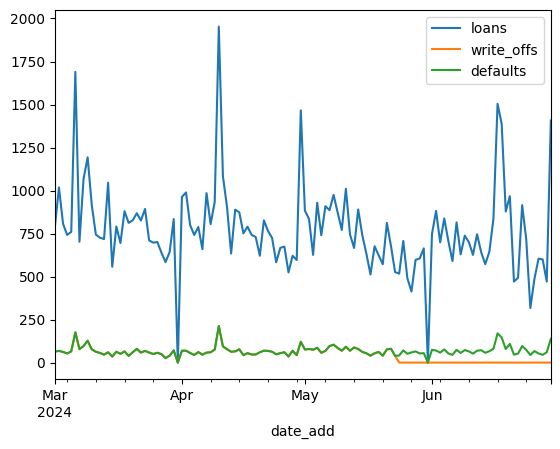

In [19]:
### loans given time
df.set_index('date_add').groupby(pd.Grouper(freq='1D')).count().loanid.plot(label='loans')
df.set_index('date_add').groupby(pd.Grouper(freq='1D')).write_off_ind.sum().plot(label='write_offs')
df.set_index('date_add').groupby(pd.Grouper(freq='1D')).default_ind.sum().plot(label='defaults')
plt.legend()

default rate is getting worse over time. Looks like time window for write offs wasn't realized on data collection

Text(0, 0.5, 'Unique Loan Rate')

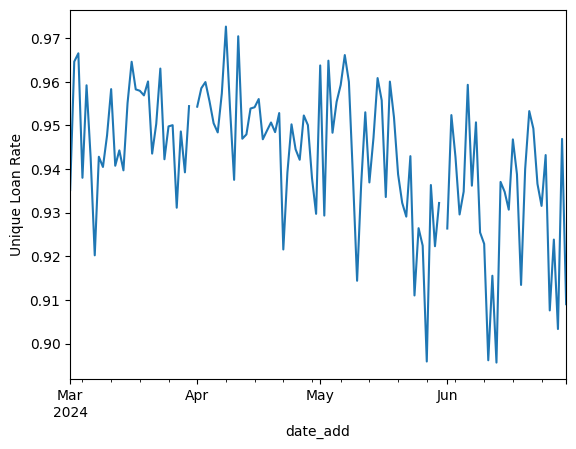

In [20]:
# unique customers taking loans
(df.set_index('date_add').groupby(pd.Grouper(freq='1D')).customerid.nunique()/
df.set_index('date_add').groupby(pd.Grouper(freq='1D')).count().loanid).plot()
plt.ylabel('Unique Loan Rate')

Customers are taking more loans per day as a function of time. I'm also a bit suprised to see it not at 1

Text(0.5, 0, 'day of the week')

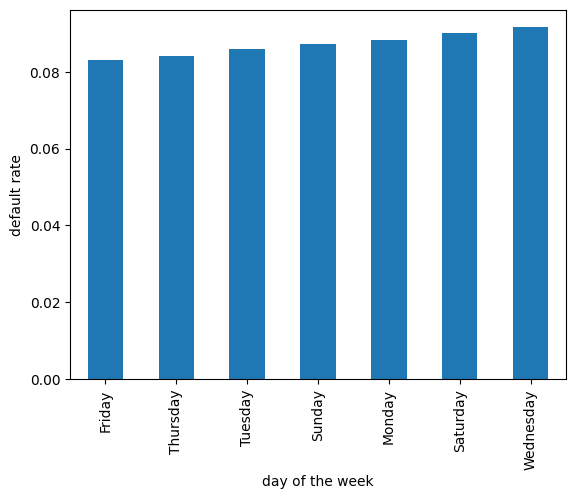

In [21]:
# see if there is a day of the week that default happen the most
df['day_of_week']=df.date_add.dt.day_name()
(df.query('default_ind==1').groupby('day_of_week').count().loanid/
    df.groupby('day_of_week').count().loanid).sort_values().plot.bar()
plt.ylabel('default rate')
plt.xlabel('day of the week')

In [22]:
(df.query('default_ind==1').groupby('day_of_week').count().loanid/
    df.groupby('day_of_week').count().loanid).sort_values()

day_of_week
Friday       0.083137
Thursday     0.084215
Tuesday      0.086024
Sunday       0.087136
Monday       0.088342
Saturday     0.089958
Wednesday    0.091583
Name: loanid, dtype: float64

Most defaults happen on wed. but not by a lot <1%

### see if first loan has a higher default rate


In [23]:
# calculate loan number
loan_number = []
for index, c_df in df.groupby('customerid')[['date_add','loanid','default_ind']]:
    c_df = c_df.sort_values(by='date_add')
    c_df['loan_number']=np.arange(1,c_df.shape[0]+1)
    loan_number.append(c_df.copy())
loan_number = pd.concat(loan_number)
df = df.join(loan_number['loan_number'])
df.head()

,customerid,loanid,date_add,prodcode,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,default_ind,write_off_ind,day_of_week,loan_number
0,e1d4435674175cc4017fa46c1c2f0478314dc697b08bf4...,Agent_OD_249059589,2024-03-23 07:28:31,Overdraft,181026.11,5249757.2,130223.047090,769.95,22328.64,580.451625,...,1,-107407.4074,32,5,-312000.0,1691250.0,0,0,Saturday,1
0,e1d4435674175cc4017fa46c1c2f0478314dc697b08bf4...,Agent_OD_249059589,2024-03-23 07:28:31,Overdraft,181026.11,5249757.2,130223.047090,769.95,22328.64,580.451625,...,1,-107407.4074,32,5,-312000.0,1691250.0,0,0,Saturday,1
0,e1d4435674175cc4017fa46c1c2f0478314dc697b08bf4...,Agent_OD_249059589,2024-03-23 07:28:31,Overdraft,181026.11,5249757.2,130223.047090,769.95,22328.64,580.451625,...,1,-107407.4074,32,5,-312000.0,1691250.0,0,0,Saturday,1
0,e1d4435674175cc4017fa46c1c2f0478314dc697b08bf4...,Agent_OD_249059589,2024-03-23 07:28:31,Overdraft,181026.11,5249757.2,130223.047090,769.95,22328.64,580.451625,...,1,-107407.4074,32,5,-312000.0,1691250.0,0,0,Saturday,1
1,8503cedac67cad3d830aff6e1219bc301d0d41aa8cd638...,Agent_OD_252459496,2024-03-28 09:37:43,Overdraft,547723.81,16431714.4,280743.120389,1972.09,59162.88,483.518444,...,1,-70000.0000,4,3,-36400.0,101250.0,0,0,Thursday,1


Text(0, 0.5, 'Default Rate')

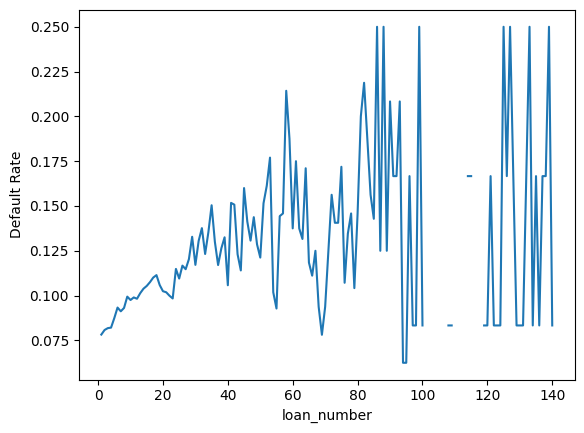

In [24]:
(df.query('default_ind==1').groupby('loan_number').count().loanid/
    df.groupby('loan_number').count().loanid).plot()
plt.ylabel('Default Rate')

Text(0, 0.5, 'Defaulted loan count')

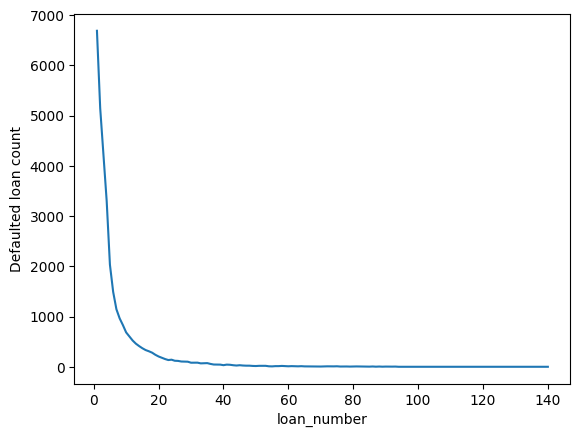

In [25]:
df.query('default_ind==1').groupby('loan_number').count().loanid.plot()
plt.ylabel('Defaulted loan count')

Text(0, 0.5, 'Total Loan count')

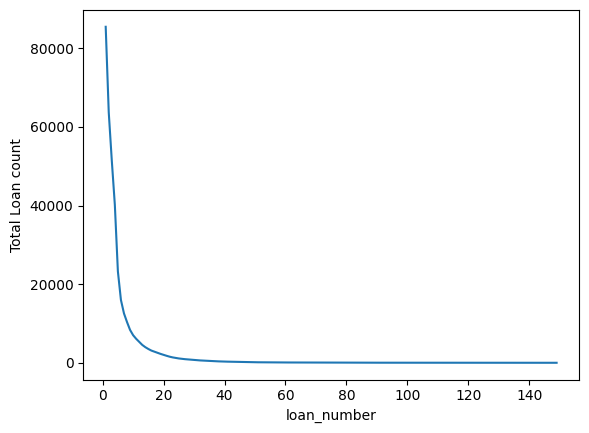

In [26]:
df.groupby('loan_number').count().loanid.plot()
plt.ylabel('Total Loan count')

Even though the default rate is lower for the 1st loan, there are more customers so more value of money is lost

### Conculsions
The default rate is increasing as Agents use the product. The Largest number of defaults happens on the first loan.

I would recomend a few score cards targeting these different areas of risk.

1. New buisness: score card to reduce the risk with the new agents
2. Loan number binned by 5 loan given (or do clustering to find the optimal value)
3. Offer lower values for initial loans to reduce risk